#Import Librarties

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import svm

#Data Colletion and Data Pre Processing

In [47]:
loan_data = pd.read_csv("/content/loan_data.csv")

In [48]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
597,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [50]:
loan_data.shape

(598, 13)

In [51]:
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
loan_data = loan_data.dropna()

In [53]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
loan_data["Loan_Status"].value_counts()

Loan_Status
Y    353
N    152
Name: count, dtype: int64

#Label Encoding

In [61]:
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [63]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


##1 --> Approved(Y)<BR>0 --> Rejected(N)

#Data Visulization

<Axes: xlabel='Education', ylabel='count'>

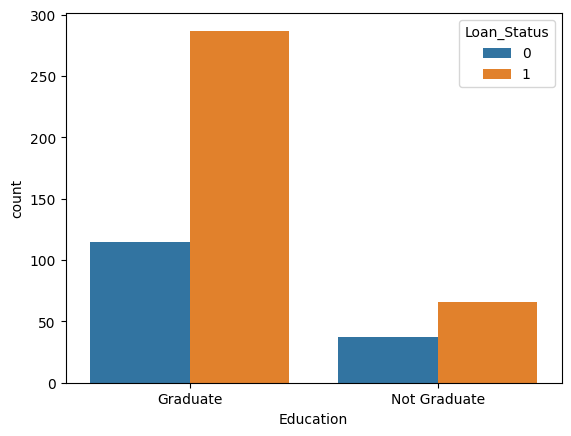

In [66]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

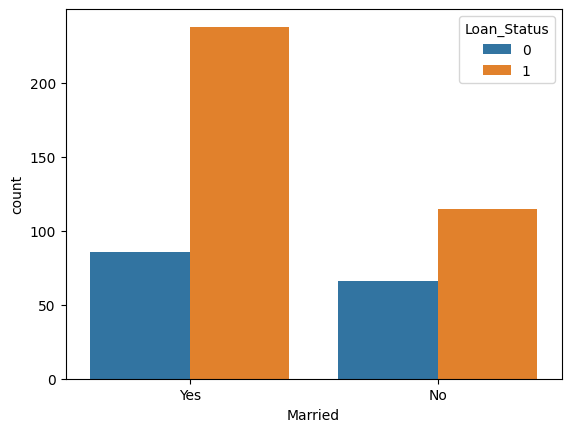

In [67]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [68]:
# convert categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [69]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [70]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            505 non-null    object 
 1   Gender             505 non-null    int64  
 2   Married            505 non-null    int64  
 3   Dependents         505 non-null    float64
 4   Education          505 non-null    int64  
 5   Self_Employed      505 non-null    int64  
 6   ApplicantIncome    505 non-null    int64  
 7   CoapplicantIncome  505 non-null    float64
 8   LoanAmount         505 non-null    float64
 9   Loan_Amount_Term   505 non-null    float64
 10  Credit_History     505 non-null    float64
 11  Property_Area      505 non-null    int64  
 12  Loan_Status        505 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 55.2+ KB


#Sepratting Features and Target

In [71]:
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [72]:
print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1         1.0          1              0             4583   
2         1        1         0.0          1              1             3000   
3         1        1         0.0          0              0             2583   
4         1        0         0.0          1              0             6000   
5         1        1         2.0          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
593       0        0         0.0          1              0             2900   
594       1        1         3.0          1              0             4106   
595       1        1         1.0          1              0             8072   
596       1        1         2.0          1              0             7583   
597       0        0         0.0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [73]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 505, dtype: int64


#Splitting data into Training Data and Testing Data

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1,stratify=Y,test_size=0.2)

In [76]:
print(X.shape, X_train.shape, X_test.shape)

(505, 11) (404, 11) (101, 11)


#Model Training

##Support Vector Machine

In [79]:
model = svm.SVC(kernel="linear")

In [80]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

#Model Evaluation

##Accuracy Score

In [82]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)

print("Accuracy on Training Data : ",X_train_accuracy)

Accuracy on Training Data :  0.7995049504950495


In [83]:
# accuracy score on testing data
X_test_prediction = model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)

print("Accuracy on Testing Data : ",X_test_accuracy)

Accuracy on Testing Data :  0.7722772277227723


#Making a Predictive System


In [88]:
input_data = (1, 0, 0.0, 1, 0, 6000, 0.0, 141.0, 360.0, 1.0, 0)

input_data_as_numpy_array = np.asarray(input_data)
reshaped_input_data = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(reshaped_input_data)
print(prediction)

if prediction[0]==1:
  print("Your Loan is Approved")
else:
  print("Your Loan is Rejected")

[1]
Your Loan is Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
